In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", context="paper")

In [78]:
MODEL = "va_lightgbm_no_odds"
STRATEGY = "distributional_robust"

backtest_odds = pd.read_csv("../../data/backtesting/backtest_odds.csv", parse_dates=["date"])
backtest_actual_10 = pd.read_csv(f"../../model_files/{MODEL}/backtest_actual_{STRATEGY}_0.1.csv")
backtest_actual_15 = pd.read_csv(f"../../model_files/{MODEL}/backtest_actual_{STRATEGY}_0.15.csv")
backtest_actual_25 = pd.read_csv(f"../../model_files/{MODEL}/backtest_actual_{STRATEGY}_0.25.csv")

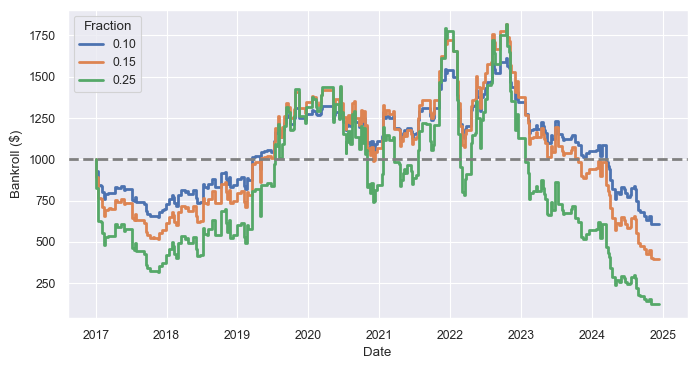

In [79]:
temp = backtest_odds[["event_id", "date"]].drop_duplicates()
dates = [pd.to_datetime("2017-01-01")] + temp["date"].tolist()

fig, ax = plt.subplots(figsize=(8, 4))
dfs = [backtest_actual_10, backtest_actual_15, backtest_actual_25]
labels = ["0.10", "0.15", "0.25"]

for df, label in zip(dfs, labels):
    bankroll = [1000] + df["bankroll"].tolist()
    _ax = sns.lineplot(
        x=dates,
        y=bankroll,
        ax=ax,
        linewidth=2,
        drawstyle="steps-pre",
        label=label,
    )
ax.set(xlabel="Date", ylabel="Bankroll ($)")
ax.axhline(1000, color="gray", linestyle="--", linewidth=2)
ax.legend(title="Fraction", loc="upper left")
plt.show()